In [7]:
import pandas as pd

from paths import DATASET_CSV_PATH
from utils import clean_text, plot_word_cloud, lemmatize_text

In [8]:
df = pd.read_csv(DATASET_CSV_PATH)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [9]:
missing_values = df.isnull().sum()
missing_values_table = pd.DataFrame({
    "Column Name": df.columns,
    "Missing Values": missing_values,
    "Percentage (%)": (missing_values / len(df)) * 100
}).reset_index(drop=True)
missing_values_table

,Column Name,Missing Values,Percentage (%)
0,review,0,0.0
1,sentiment,0,0.0


In [10]:
df["cleaned_review"] = df["review"].apply(clean_text)
df["lemmatized_review"] = df["cleaned_review"].apply(lemmatize_text)
df["original_word_count"] = df["review"].apply(lambda x: len(str(x).split()))
df["cleaned_word_count"] = df["cleaned_review"].apply(lambda x: len(str(x).split()))
df.head()

,review,sentiment,cleaned_review,lemmatized_review,original_word_count,cleaned_word_count
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching oz episode yo...,one reviewer mentioned watching oz episode you...,307,170
1,A wonderful little production. <br /><br />The...,positive,wonderful little production br br filming tech...,wonderful little production br br filming tech...,162,90
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...,thought wonderful way spend time hot summer we...,166,87
3,Basically there's a family where a little boy ...,negative,basically theres family little boy jake thinks...,basically there family little boy jake think t...,138,70
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...,petter matteis love time money visually stunni...,230,130


In [11]:
print(f"""Analysis of the Dataset:
Total entries: {len(df)}
Classes: {df["sentiment"].unique()}

Original:
    Total word count: {df["original_word_count"].sum()}
    MEAN word count per review: {df["original_word_count"].mean():.4f}
    STD word count per review: {df["original_word_count"].std():.4f}
    MAX word count in single review: {df["original_word_count"].max()}
    MIN word count in single review: {df["original_word_count"].min()}

Cleaned:
    Total word count: {df["cleaned_word_count"].sum()}
    MEAN word count per review: {df["cleaned_word_count"].mean():.4f}
    STD word count per review: {df["cleaned_word_count"].std():.4f}
    MAX word count in single review: {df["cleaned_word_count"].max()}
    MIN word count in single review: {df["cleaned_word_count"].min()}
""")


Analysis of the Dataset:
Total entries: 50000
Classes: ['positive' 'negative']

Original:
    Total word count: 11557847
    MEAN word count per review: 231.1569
    STD word count per review: 171.3440
    MAX word count in single review: 2470
    MIN word count in single review: 4

Cleaned:
    Total word count: 6076892
    MEAN word count per review: 121.5378
    STD word count per review: 91.5709
    MAX word count in single review: 1440
    MIN word count in single review: 3



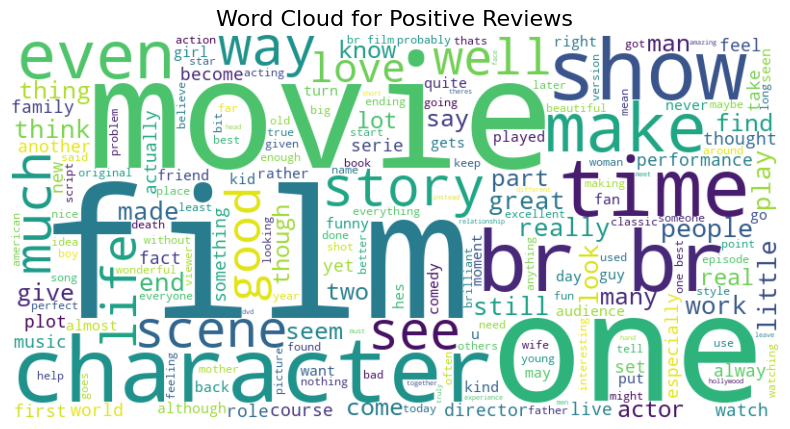

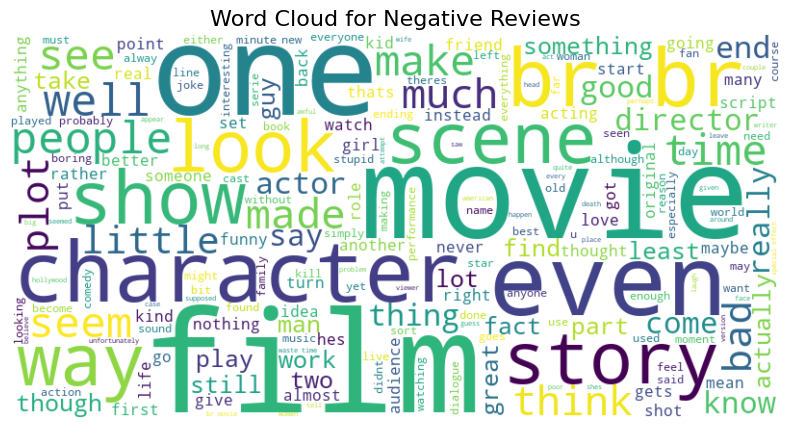

In [12]:
for sentiment in df["sentiment"].unique():
    text = " ".join(df[df["sentiment"] == sentiment]["cleaned_review"])
    plot_word_cloud(text, sentiment)